# Model Training

In [7]:
import zipfile

import tensorflow as     tf
from   tensorflow import keras
import sklearn as sk

In [8]:
# TODO Split the GPU up into multiple GPUs?

In [9]:
# TODO Use the dataset's pre-fetch method?

In [10]:
for _ in ['training-data', 'testing-data']:
    with zipfile.ZipFile(f'{_}.zip', 'r') as zip_ref:
        zip_ref.extractall()

In [11]:
# By zalandoresearch

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
        print(labels.shape)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
        print(images.shape)
        
    return images, labels

In [12]:
X_train_full, y_train_full = load_mnist('training-data', kind='train')
# X_test, y_test   = load_mnist('testing-data', kind='t10k')

(60000,)
(60000, 784)


In [13]:
validation_set_size     = 5000
maximum_pixel_intensity = 255.0

In [14]:
X_valid, X_train = X_train_full[:validation_set_size] / maximum_pixel_intensity, X_train_full[validation_set_size:] / maximum_pixel_intensity
y_valid, y_train = y_train_full[:validation_set_size], y_train_full[validation_set_size:]
# X_test           = X_test / maximum_pixel_intensity

In [15]:
X_valid.shape

(5000, 784)

In [16]:
X_train.shape

(55000, 784)

In [17]:
y_valid.shape

(5000,)

In [18]:
y_train.shape

(55000,)

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### `keras` Callbacks

#### `Checkpoint` Callback

In [23]:
# TODO Prepend the uploads directory and the broader path to this filename.

# outfile_pathname  = 'MWSTORE:trained_model.h5'
outfile_pathname  = 'trained_model.h5'
checkpoint_cb     = keras.callbacks.ModelCheckpoint(outfile_pathname, save_best_only=True)

#### `EarlyStopping` Callback

In [24]:
# TODO Make `patience` dynamic, according to the user-response to the question "How will it automatically stop training?" in the Electron app.

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

In [25]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7081 - accuracy: 0.7649 - val_loss: 0.5033 - val_accuracy: 0.8336
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4870 - accuracy: 0.8301 - val_loss: 0.4492 - val_accuracy: 0.8416
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4433 - accuracy: 0.8432 - val_loss: 0.4303 - val_accuracy: 0.8450
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4151 - accuracy: 0.8537 - val_loss: 0.4023 - val_accuracy: 0.8566
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3949 - accuracy: 0.8616 - val_loss: 0.3815 - val_accuracy: 0.8678
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3793 - accuracy: 0.8668 - val_loss: 0.3744 - val_accuracy: 0.8704
Epoch 7/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3648 - accuracy: 0.8706 - val_loss: 0.3761 - val_accuracy:

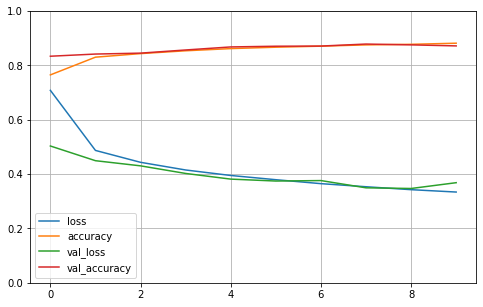

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show() #bp3

In [27]:
import tensorflow


In [28]:
tensorflow.__version__



'2.5.0'